In [1]:
import pandas as pd
from DataProcessing import *
import pprint
import gensim
import os

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ryanbaker16/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
meeting_dict = read_data()
print(meeting_dict)

{'ES2010a.transcript.tx': [{'speaker': '', 'dialog': ['think', 'forgo', 'whiteboard', 'actual', 'write', 'artist', 'skill', 'draw', 'like', 'grade', 'draw', 'kitti', 'pretti', 'imposs', 'tell', 'love', 'cat', 'love', 'cat', 'independ', 'pretti', 'know', 'want', 'allerg', 'cat', 'sleep', 'room', 'tri', 'suggest', 'wanna', 'multifunct', 'remot', 'right', 'remot', 'think', 'phase', 'v_h_s_', 'short', 'okay', 'figur', 'cover', 'differ', 'varianc', 'signal', 'curvatur', 'like', 'match', 'curvatur', 'hand', 'kinda', 'batteri', 'want', 'batteri', 'chang', 'usual', 'okay', 'yeah', 'small', 'lithium', 'batteri'], 'da_tags': ''}, {'speaker': '', 'dialog': ['arrow', 'fine', 'know', 'yeah', 'life', 'draw', 'badger', 'yeah', 'dunno', 'grumpi', 'nocturn', 'littl', 'like', 'know', 'wind', 'willow', 'badger', 'yeah', 'know', 'know', 'brian', 'liverpudlian', 'writer', 'kind', 'book', 'badger', 'cool', 'wait', 'sound', 't_v_', 'd_v_d_', 'v_h_s_', 'tivo', 'gonna', 'like', 'soni', 'like', 'know', 'time', 

In [3]:
texts = []

for key in meeting_dict:
    for dick in meeting_dict[key]:
        texts += dick['dialog']
print(texts)

['think', 'forgo', 'whiteboard', 'actual', 'write', 'artist', 'skill', 'draw', 'like', 'grade', 'draw', 'kitti', 'pretti', 'imposs', 'tell', 'love', 'cat', 'love', 'cat', 'independ', 'pretti', 'know', 'want', 'allerg', 'cat', 'sleep', 'room', 'tri', 'suggest', 'wanna', 'multifunct', 'remot', 'right', 'remot', 'think', 'phase', 'v_h_s_', 'short', 'okay', 'figur', 'cover', 'differ', 'varianc', 'signal', 'curvatur', 'like', 'match', 'curvatur', 'hand', 'kinda', 'batteri', 'want', 'batteri', 'chang', 'usual', 'okay', 'yeah', 'small', 'lithium', 'batteri', 'arrow', 'fine', 'know', 'yeah', 'life', 'draw', 'badger', 'yeah', 'dunno', 'grumpi', 'nocturn', 'littl', 'like', 'know', 'wind', 'willow', 'badger', 'yeah', 'know', 'know', 'brian', 'liverpudlian', 'writer', 'kind', 'book', 'badger', 'cool', 'wait', 'sound', 't_v_', 'd_v_d_', 'v_h_s_', 'tivo', 'gonna', 'like', 'soni', 'like', 'know', 'time', 'simpl', 'one', 'doubl', 'yeah', 'guess', 'need', 'tripl', 'peopl', 'usual', 'doubl', 'right', 'y

In [4]:
count = 0
for key in meeting_dict:
    print("Meeting {} topic modeling:\n".format(key))
    dictionary, corpus_bow = lda_bag_of_words(meeting_dict[key])
    corpus_tfidf = td_idf(corpus_bow)

    print("LDA TD-IDF topic modeling with 10 topics")
    lda_model_tfidf = gensim.models.hdpmodel.HdpModel(corpus_tfidf, dictionary)
    for idx, topic in lda_model_tfidf.print_topics(-1):
        print('Topic: {} Word: {}'.format(idx, topic))
    print("\n")

    print("LDA Bag of Words topic modeling with 10 topics")
    lda_model = gensim.models.hdpmodel.HdpModel(corpus_tfidf, dictionary)
    for idx, topic in lda_model.print_topics(-1):
        print('Topic: {} \nWords: {}'.format(idx, topic))
    print("\n\n\n")

Meeting ES2010a.transcript.tx topic modeling:

LDA TD-IDF topic modeling with 10 topics


LDA Bag of Words topic modeling with 10 topics






In [5]:
import pickle
import pyLDAvis
from pyLDAvis import gensim_models

In [6]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model,
                              corpus=corpus_bow,
                              dictionary=dictionary)

pyLDAvis.display(vis)

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
vis2 = pyLDAvis.gensim_models.prepare(topic_model=lda_model_tfidf,
                              corpus=corpus_tfidf,
                              dictionary=dictionary)
pyLDAvis.display(vis2)

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


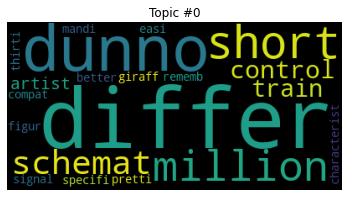

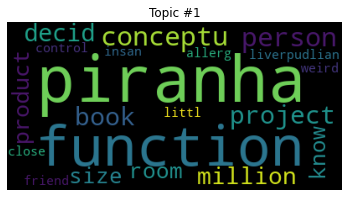

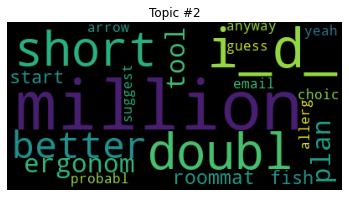

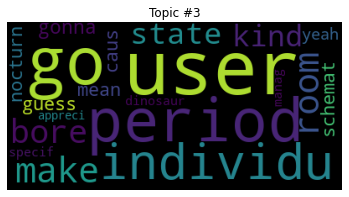

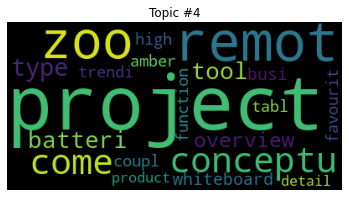

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for t in range(5):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model_tfidf.show_topic(t, 20))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
hdp_cm_tfidf = CoherenceModel(model=lda_model_tfidf, corpus=corpus_tfidf, dictionary=dictionary, texts=texts, coherence='c_v')
HDP_cm = hdp_cm_tfidf.get_coherence()
HDP_cm

In [16]:
#Testing on 2 sentences from the modeled meeting
sample_text = ["Um right now so we're all gonna draw our favourite animal and then sum up our favourite characteristics of that animal.", "We're going to make this an international product marketed in the States, in Europe, in Asia."]
sample_docs = []
for text in sample_text:
    pptext = preprocess(text)
    sample_doc = dictionary.doc2bow(pptext)
    print(lda_model_tfidf[sample_doc])

[(0, 0.06168298463022102), (1, 0.025124367741700654), (2, 0.014951625587601998), (13, 0.8735396261353333)]
[(0, 0.48395712614050673), (1, 0.4713446200120611), (2, 0.01684236490107026), (3, 0.010632772150580052)]


/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
